# Anlálisis Exploratorio: Creadores de Contenido, Amplifcadores, Bursters, Eventuales


## Abstract

Es posible realizar un análisis de dos dimensiones nuevas: Porcentaje de los usuarios que retwittean más contenido del que crean, y usuarios que twittean con una frecuencia que excede largamente el de los usuarios normales. En ambos casos se encontró en este sample (ver preliminares y metodología) una porción significativa de estos usuarios, con los marcadores establecidos (tiempo entre retweets, quantil .75 y porcentaje de tweets/retweets),  cercanos al 20% en el primero, y cerca del 17% en el segundo.
Por otra parte, es posible encontrar una asimetría en favor de la categoría que según la nota anterior se oponía al reclamo, cercana al 20% sobre el total de proporción de agentes con características muy alejadas del usuario promedio, detectados.

## Preliminares

Previamente, basado en el análisis sobre el [excel provisto por Yamila Abbas](https://github.com/Esiravegna/my_jupyter/blob/master/Bot%20si%20vs%20Bot%20no%20-%20%20Preliminares.ipynb),se determinaron algunos posibles marcadores para detectar lo que en Jugada Preparada se entiende que son usuarios o automatizados, o con comportamiento anómalo. Si bien aparentemente en la dirección correcta, las hipótesis resultaron evidenciarse de una manera más amplia, que incluye a usuarios de comportamiento anómalo en ambos clusters, aunque con proporciones diferentes.

## Metodología

En virtud de las timelines bajadas por Facundo, y usando [este](https://gist.github.com/Esiravegna/581ed1842697ef9cab936008b1c66e7d) scrapper, se genera la sumarización por usuario, en un sample aleatorio de 3000,  disponible [acá](https://www.dropbox.com/s/o1nii11rfughhz7/sample_3k.xls?dl=1). La única diferencia con el genrado por el código es la remoción de columnas que puedan ser usadas para identificar el usuario, o su pertenencia a la categorización anterior (apoyar/rechazar el reclamo del CONICET) y su shuffling.

### Limitaciones

Twitter solo deja bajar 3200 twits por usuario. Eso acorta significativamente el rango de fechas a analizar en usuarios muy activos.

### Consideraciones iniciales

Comparemos brevemente las timelines de dos usuarios

In [4]:
from __future__ import division

import pandas as pd
import numpy as np
import json
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request as r
from IPython.display import display

def bajar_json(url):
    """
    
    """
    df = pd.DataFrame(json.loads(r.urlopen(url).read().decode('utf8'))['tweets'])
    df['created_at'] = pd.to_datetime(df.created_at)
    df.sort_values(by='created_at', inplace=True)
    return df

In [34]:
normal = bajar_json('https://gist.githubusercontent.com/Esiravegna/1b8695d02e1999d219c64f96214063b9/raw/b52cbf6921ed659a59ca2b905077598641441747/normal.json')
anomalo = bajar_json('https://gist.githubusercontent.com/Esiravegna/8c5017f58ebf1a540fcc82dbcc62c6fc/raw/ee33480f9932b34bbe6e312e59607a03b611ca59/anomalo.json')

Comparemos el número de plots por día. Un usuario normal a la izquierda, anómalo a la derecha.

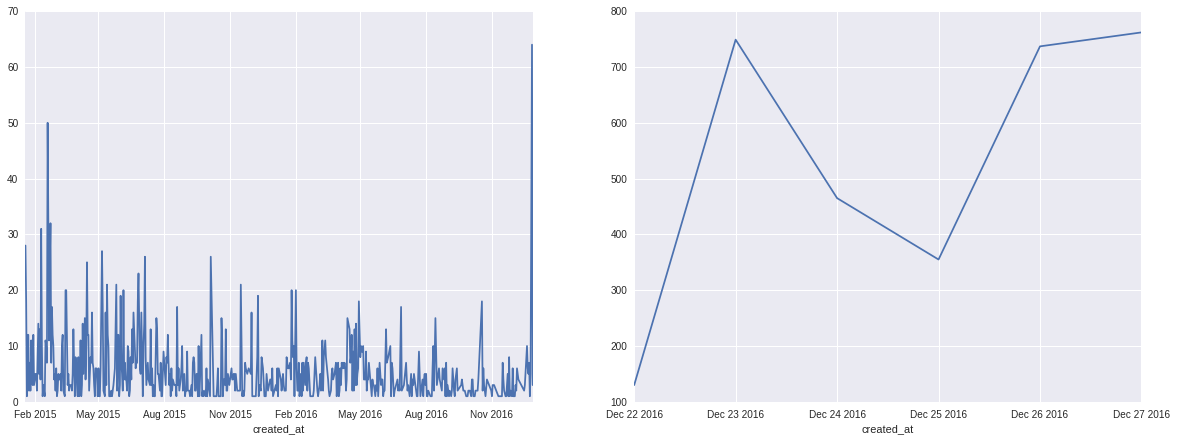

In [46]:
fig, axs = plt.subplots(1,2,figsize=(20, 7))
normal.groupby(normal.created_at.dt.date).id.count().plot(ax=axs[0])
anomalo.groupby(anomalo.created_at.dt.date).id.count().plot(ax=axs[1])

Considerando las limitaciones, tenemos claramente un volumen muy elevado de tweets entre los dos usuarios. Probemos un análisis más fino : cuánto tiempo hay entre twits, en segundos?

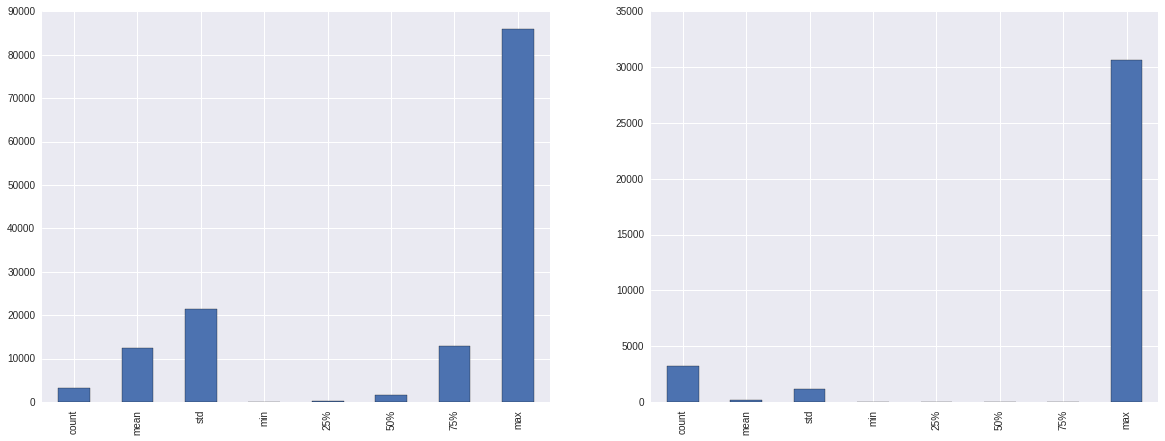

In [50]:
fig, axs = plt.subplots(1,2,figsize=(20, 7))

normal.created_at.diff().dt.seconds.fillna(0).describe().plot.bar(ax=axs[0])
anomalo.created_at.diff().dt.seconds.fillna(0).describe().plot.bar(ax=axs[1])

Claramente hay diferencias. Veamos numéricamente:

In [55]:
display(normal.created_at.diff().dt.seconds.fillna(0).describe(), anomalo.created_at.diff().dt.seconds.fillna(0).describe())

count     3197.000000
mean     12469.984986
std      21320.413921
min          0.000000
25%        236.000000
50%       1508.000000
75%      12856.000000
max      85945.000000
Name: created_at, dtype: float64

count     3198.000000
mean       135.933709
std       1134.165552
min          0.000000
25%          9.000000
50%         15.000000
75%         29.000000
max      30634.000000
Name: created_at, dtype: float64

Es decir, el usuario inferior tiene el 75% de sus twits producidos antes de los 29 segundos. El superior, en varios minutos, casi veinte. Acá tenemos claramente una separación: El inferior genera contenido en ráfagas, bursts, y el superior, en forma más lenta.

Otra métrica importante, que no está en los timelines por usuario y que es importante es el ratio tweets/retweets. Entiendo que sería posible determinar un espectro de gente que sólo reproduce twits (amplificadores) versus creadores de contenido. Idealmente, esta distribución debería tender a algo parecido a la regla del [1%](https://en.wikipedia.org/wiki/1%25_rule_(Internet_culture)), o tal vez a una [distribución de Pareto](https://en.wikipedia.org/wiki/Pareto_distribution). Veamos que podemos sacar entonces.



## Análisis Exploratorio


### Creadores vs Amplificadores

Veamos si resulta posible caracterizar el sample de la población en Creadores de contenido (pocos retwets) vs Amplificadores (muchos)


In [191]:
df = pd.read_excel('https://www.dropbox.com/s/o1nii11rfughhz7/sample_3k.xls?dl=1')

In [192]:
df.head(5)

,contributors_enabled,created_at,default_profile,default_profile_image,entities,favourites_count,follow_request_sent,followers_count,following,friends_count,...,segundos_entre_tw_min,segundos_entre_tw_std,status,statuses_count,time_zone,translator_type,twits_sampleados,url,utc_offset,verified
0,False,2010-10-28 20:36:07,True,False,{'description': {'urls': []}},21738,False,501,False,550,...,0.0,24652.545404,"{'id': 813808857680068609, 'lang': 'es', 'retw...",18619,NaN,none,3177,NaN,NaN,False
1,False,2015-08-31 14:05:16,False,False,{'description': {'urls': []}},17,False,40,False,209,...,0.0,20589.670815,"{'id': 813389440332759042, 'lang': 'en', 'retw...",30,NaN,none,30,NaN,NaN,False
2,False,2013-04-30 23:10:48,True,False,{'description': {'urls': []}},1794,False,31,False,118,...,0.0,24192.766453,"{'id': 813567162120081409, 'lang': 'es', 'retw...",2430,NaN,none,2421,NaN,NaN,False
3,False,2016-01-02 19:50:36,True,False,{'description': {'urls': []}},993,False,615,False,620,...,0.0,19779.616875,"{'id': 813840308433731585, 'lang': 'es', 'retw...",1906,NaN,none,1906,NaN,NaN,False
4,False,2012-12-31 17:39:06,False,False,{'description': {'urls': []}},2877,False,904,False,1042,...,0.0,21184.291632,"{'id': 813801840051683333, 'lang': 'es', 'retw...",41388,Caracas,none,3197,NaN,-14400.0,False


calculemos el reatio entonces:

In [193]:
df['twt_rt_ratio'] = df.retweets_sampleados / df.twits_sampleados
df.twt_rt_ratio.describe()

count    3000.000000
mean        0.566253
std         0.278578
min         0.000000
25%         0.342628
50%         0.571635
75%         0.819124
max         1.000000
Name: twt_rt_ratio, dtype: float64

Entonces,el promedio sería un usuario que aproxiamadamente crea un poco menos contenido del que comparte (57%), y un outlier seria alguien con un porcentaje de retweets de mas o menos el 85% (al hablar de ratios no podemos simplemente hacer 4 * std), o menos del 15%, a grosso modo.

In [194]:
BINS_POR_RATIO = [0, .1, .56, .85, 1.]
LABELS_POR_RATIO = ['Creador','Normal','Sharer','Amplificador']
dist_por_categoria = (pd.cut(df.twt_rt_ratio, 
                             labels=LABELS_POR_RATIO, 
                             bins=BINS_POR_RATIO).value_counts()/len(df)) * 100
df['tipo_por_retweet'] = pd.cut(df.twt_rt_ratio, 
                                labels=LABELS_POR_RATIO, 
                                bins=BINS_POR_RATIO)
df.head()

,contributors_enabled,created_at,default_profile,default_profile_image,entities,favourites_count,follow_request_sent,followers_count,following,friends_count,...,status,statuses_count,time_zone,translator_type,twits_sampleados,url,utc_offset,verified,twt_rt_ratio,tipo_por_retweet
0,False,2010-10-28 20:36:07,True,False,{'description': {'urls': []}},21738,False,501,False,550,...,"{'id': 813808857680068609, 'lang': 'es', 'retw...",18619,NaN,none,3177,NaN,NaN,False,0.942713,Amplificador
1,False,2015-08-31 14:05:16,False,False,{'description': {'urls': []}},17,False,40,False,209,...,"{'id': 813389440332759042, 'lang': 'en', 'retw...",30,NaN,none,30,NaN,NaN,False,0.866667,Amplificador
2,False,2013-04-30 23:10:48,True,False,{'description': {'urls': []}},1794,False,31,False,118,...,"{'id': 813567162120081409, 'lang': 'es', 'retw...",2430,NaN,none,2421,NaN,NaN,False,0.538620,Normal
3,False,2016-01-02 19:50:36,True,False,{'description': {'urls': []}},993,False,615,False,620,...,"{'id': 813840308433731585, 'lang': 'es', 'retw...",1906,NaN,none,1906,NaN,NaN,False,0.145855,Normal
4,False,2012-12-31 17:39:06,False,False,{'description': {'urls': []}},2877,False,904,False,1042,...,"{'id': 813801840051683333, 'lang': 'es', 'retw...",41388,Caracas,none,3197,NaN,-14400.0,False,0.918361,Amplificador


In [195]:
dist_por_categoria

Normal          44.333333
Sharer          30.433333
Amplificador    20.900000
Creador          3.900000
Name: twt_rt_ratio, dtype: float64

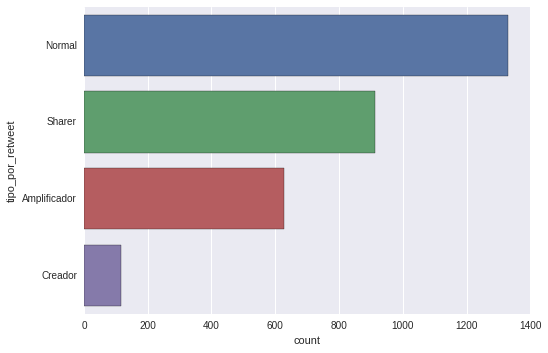

In [196]:
sns.countplot(y='tipo_por_retweet', 
              data=df, 
              order=['Normal', 'Sharer', 'Amplificador', 'Creador'])


La distribución no encaja exactamente ni en un pareto, ni un 90-9-1, sino más bien en un punto intermedio. Si bien esto pone en entredicho la representatividad del corpus (o del sample aleatorio, con el que estamos trabajando, si bien menos probable), es posible que haber elegido un tema con tanto volumen impacte, o sean características de twitter argentina, o similar.

## Tiempo entre twits y retweets


Este fue un punto interesante de análisis, y el que dio inicio a este análisis. Veamos los promedios de todo el corpus

In [197]:
df[[   'segundos_entre_rt_mean',
       'segundos_entre_tw_mean', 
       'segundos_entre_rt_25%', 
       'segundos_entre_rt_50%',
       'segundos_entre_rt_75%',
       'segundos_entre_tw_25%', 
       'segundos_entre_tw_50%',
       'segundos_entre_tw_75%',
   ]].describe()

,segundos_entre_rt_mean,segundos_entre_tw_mean,segundos_entre_rt_25%,segundos_entre_rt_50%,segundos_entre_rt_75%,segundos_entre_tw_25%,segundos_entre_tw_50%,segundos_entre_tw_75%
count,2987.000000,2992.000000,2987.000000,2987.000000,2987.000000,2992.000000,2992.000000,2992.000000
mean,14823.259435,16983.905848,1089.793606,6481.496652,22559.804737,1162.761949,7165.839906,26619.740391
std,10769.072059,9807.643867,2668.759876,9716.103823,22175.914256,2620.367609,9603.710086,20969.631477
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5351.489297,9084.720688,27.000000,114.000000,1278.875000,149.000000,630.875000,6480.937500
50%,12884.768024,16029.036926,96.000000,1355.000000,14879.750000,288.000000,2795.000000,23488.500000
75%,22916.329582,24030.275104,591.250000,9233.000000,41652.500000,852.750000,10053.500000,44096.687500
max,52089.666667,51803.666667,45844.000000,65707.500000,83936.000000,38260.000000,76520.000000,84235.500000


Acá tenemos entonces un par de baselines interesantes: los segundos entre retweets y twits para el promedio, y los quantiles. Volviendo a las consideraciones iniciales, los valores promedios se alejan bastante de los tiempos del usuario anómalo, tanto en valor medio como en el quantil 75%.

Queda asentado, por otra parte,que estamos trabajando con promedio de promedios y es posible un error de estiamdor importante por la desviación estándar de la serie particular de cada timeline.

Determinemos algunos valores de corte, ahora, para el eje Burster/Promedio, basado en el quantil 75 como vimos en las consideraciones iniciales.

In [198]:
RANGE_RT_75 = [0, 
 df['segundos_entre_rt_75%'].mean() - df['segundos_entre_rt_75%'].std(), 
 df['segundos_entre_rt_75%'].mean(),
 df['segundos_entre_rt_75%'].mean() + df['segundos_entre_rt_75%'].std(),
 df['segundos_entre_rt_75%'].max()
]
RANGE_TWT_75 = [0, df['segundos_entre_tw_75%'].mean() - df['segundos_entre_tw_75%'].std(), 
 df['segundos_entre_tw_75%'].mean(),
 df['segundos_entre_tw_75%'].mean() + df['segundos_entre_tw_75%'].std(),
df['segundos_entre_tw_75%'].max()
]
LABELS_TIEMPO_TWITS = ['Burst','Promedio', 'Eventual', 'Menos Activo']
RANGE_RT_75

[0, 383.89048106587506, 22559.80473719451, 44735.718993323142, 83936.0]

In [149]:
RANGE_TWT_75

[0, 5220.2844648278515, 26281.149624624624, 47342.014784421393, 84235.5]

Es notable la similitud de distribuciones entre los valores de retweet y twit, en los ultimos tres quantiles. Esto posiblemente se deba a que los usuarios siguen [patrones establecidos](https://blog.bufferapp.com/best-time-to-tweet-research) probablemente relacionados con el ciclo de sueño y similar.
Apliquemos estos valores al corpus.

In [199]:
dist_por_avg_time_twt = (pd.cut(df['segundos_entre_tw_75%'], 
                             labels=LABELS_TIEMPO_TWITS, 
                             bins=RANGE_TWT_75).value_counts()/len(df)) * 100
dist_por_avg_time_twt

Promedio        30.933333
Eventual        25.900000
Burst           22.400000
Menos Activo    20.133333
Name: segundos_entre_tw_75%, dtype: float64

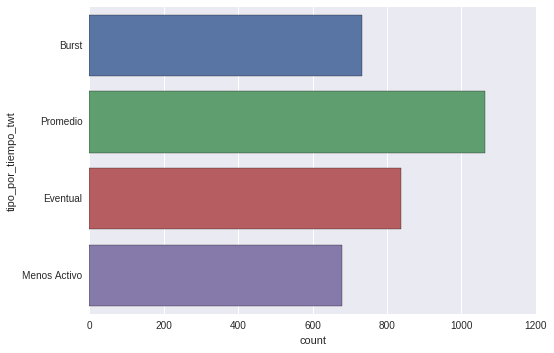

In [142]:
df['tipo_por_tiempo_twt'] = pd.cut(df['segundos_entre_tw_75%'], 
                             labels=LABELS_TIEMPO_TWITS, 
                             bins=RANGE_TWT_75)
sns.countplot(y='tipo_por_tiempo_twt', 
              data=df, 
              order=LABELS_TIEMPO_TWITS)

Veamos ahora por tiempo de retweet.

In [201]:
dist_por_avg_time_rt = (pd.cut(df['segundos_entre_rt_75%'], 
                             labels=LABELS_TIEMPO_TWITS, 
                             bins=RANGE_RT_75).value_counts()/len(df)) * 100
dist_por_avg_time_rt

Promedio        39.766667
Menos Activo    22.000000
Eventual        20.733333
Burst           17.033333
Name: segundos_entre_rt_75%, dtype: float64

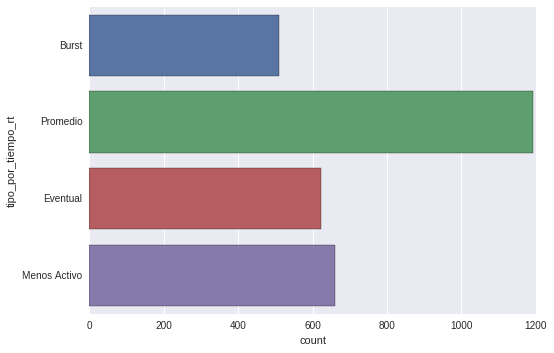

In [200]:
df['tipo_por_tiempo_rt'] = pd.cut(df['segundos_entre_rt_75%'], 
                             labels=LABELS_TIEMPO_TWITS, 
                             bins=RANGE_RT_75)
sns.countplot(y='tipo_por_tiempo_rt', 
              data=df, 
              order=LABELS_TIEMPO_TWITS)

## Análisis Conjunto

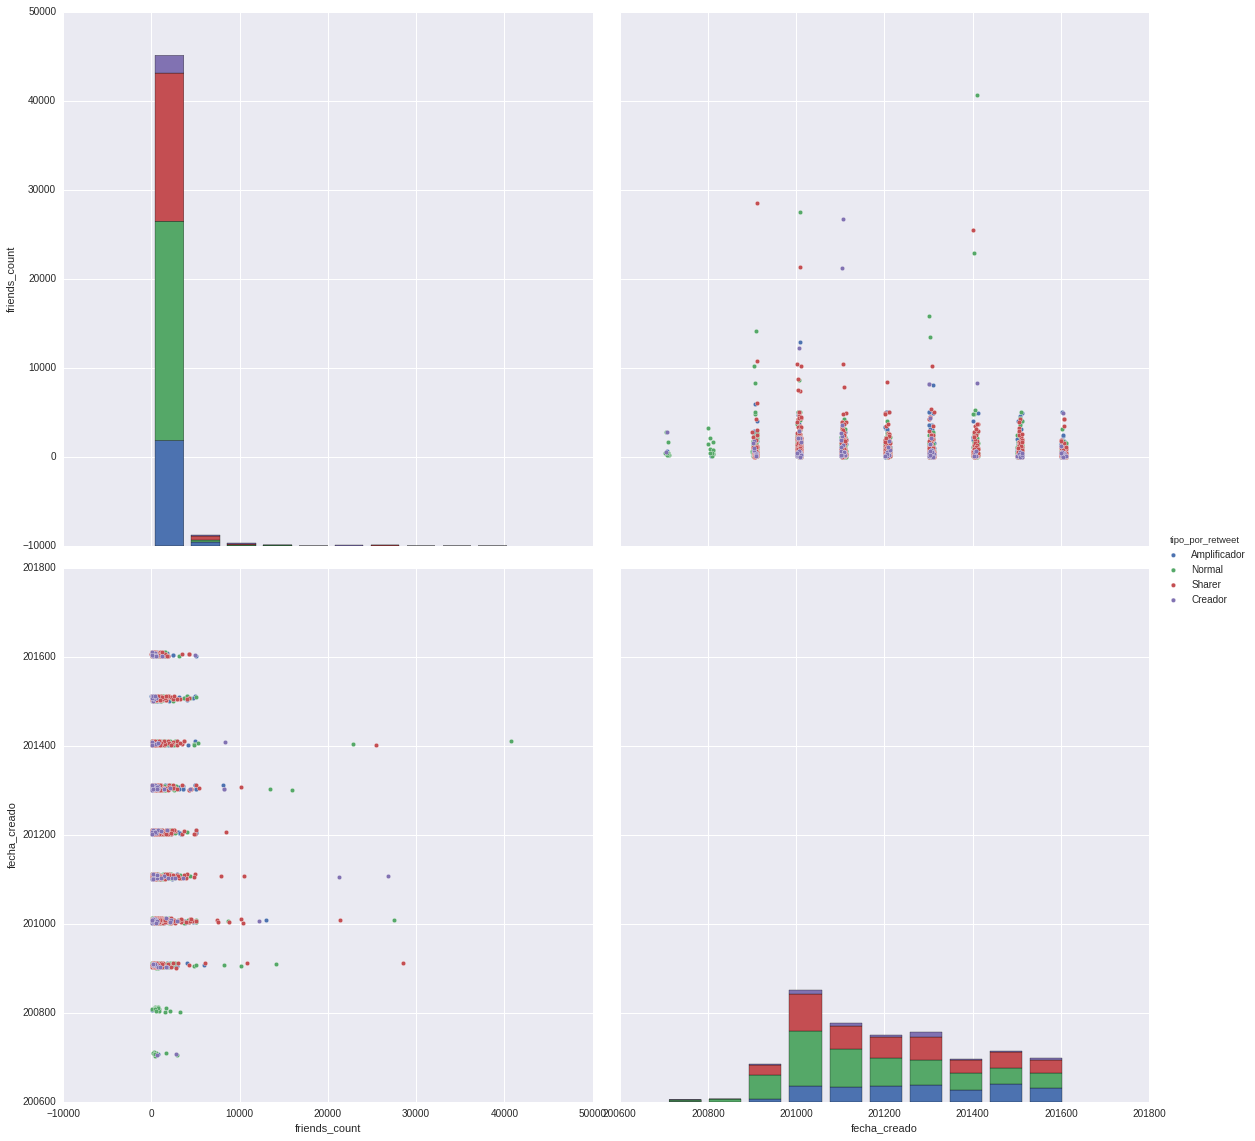

In [183]:
df['fecha_creado'] = df.created_at.apply(lambda x: int("{}{:02d}".format(x.year, x.month)))
sns.pairplot(df[['tipo_por_retweet','friends_count','fecha_creado']],hue='tipo_por_retweet', size=8)

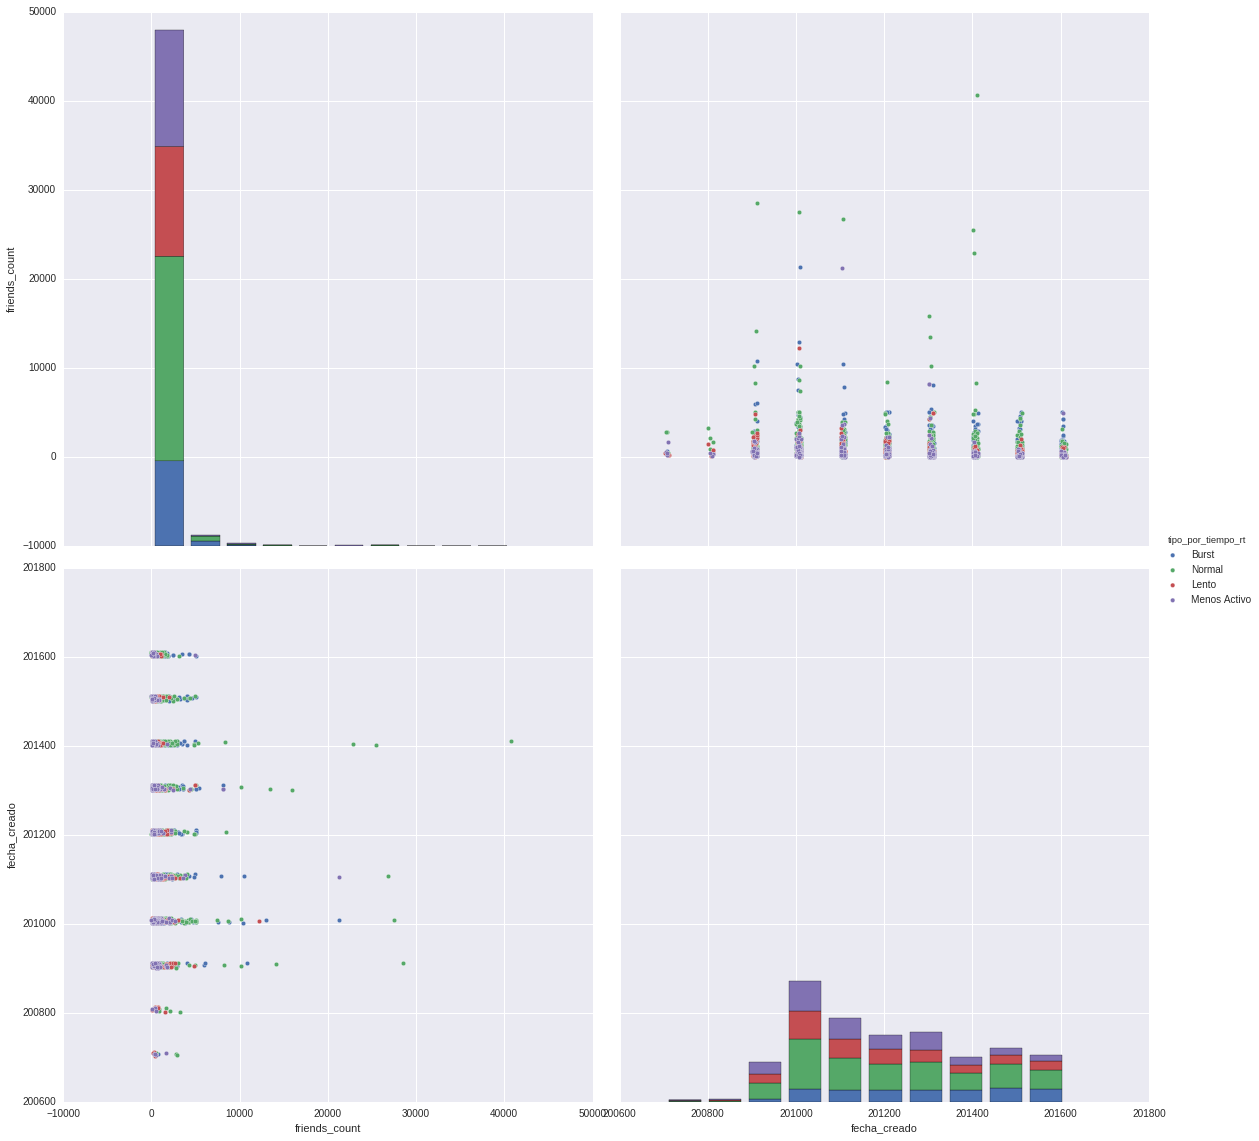

In [120]:
sns.pairplot(df[['tipo_por_tiempo_rt','friends_count','fecha_creado']],hue='tipo_por_tiempo_rt', size=8)

No se observan a simple vista mayores diferencias cuando se comparan la distribución de friends_count y fecha por cualquiera de las dos dimensiones nuevas. El número total de Twits, toda vez que sabemos que estamos limitados a 3200 y que seguramente va a variar su distribucion en el tiempo en relación a si el usuario twittea/retwiteea mucho, no se considera una variable interesante para analizar.

### Addenda: Distribución en la caracterización poblacional anterior

Si bien no es el objetivo de este análisis, considerando que se omitieron a propósito, quizás tenga sentido realizar un análisis de la distribución de estos marcadores para categorizar población considerando la estructura a favor/en contra realizada en la nota. 
Para tal efecto, se registaron las etiquetas de acuerdo a la segmentación que hizo del corpus de timelines Facundo, en un dataframe ad hoc con una estructura lover=a favor/hater = en contra del reclamo,  y vamos a aplicarla al dataframe en estudio usando un join.

In [202]:
labels_legacy = pd.read_csv('~/data/la_caja_del_gato/labels_by_id.csv')

In [127]:
labels_legacy.head(3)

,id_str,legacy_cluster_label
0,733771390717984768,lover
1,109353330,lover
2,792195968712241152,lover


In [203]:
df = pd.merge(df, labels_legacy, on='id_str')

In [204]:
df.head(5)

,contributors_enabled,created_at,default_profile,default_profile_image,entities,favourites_count,follow_request_sent,followers_count,following,friends_count,...,time_zone,translator_type,twits_sampleados,url,utc_offset,verified,twt_rt_ratio,tipo_por_retweet,tipo_por_tiempo_rt,legacy_cluster_label
0,False,2010-10-28 20:36:07,True,False,{'description': {'urls': []}},21738,False,501,False,550,...,NaN,none,3177,NaN,NaN,False,0.942713,Amplificador,Burst,hater
1,False,2015-08-31 14:05:16,False,False,{'description': {'urls': []}},17,False,40,False,209,...,NaN,none,30,NaN,NaN,False,0.866667,Amplificador,Menos Activo,lover
2,False,2013-04-30 23:10:48,True,False,{'description': {'urls': []}},1794,False,31,False,118,...,NaN,none,2421,NaN,NaN,False,0.538620,Normal,Promedio,hater
3,False,2016-01-02 19:50:36,True,False,{'description': {'urls': []}},993,False,615,False,620,...,NaN,none,1906,NaN,NaN,False,0.145855,Normal,Menos Activo,hater
4,False,2012-12-31 17:39:06,False,False,{'description': {'urls': []}},2877,False,904,False,1042,...,Caracas,none,3197,NaN,-14400.0,False,0.918361,Amplificador,Burst,hater


Entonces, ahora, la pregunta: *Hay más amplificadores de alguno de los lados de esta distribución?*

In [205]:
df[df['legacy_cluster_label']=='lover'].tipo_por_retweet.value_counts() / len(df[df['legacy_cluster_label']=='lover']) * 100

Normal          48.643650
Sharer          26.633785
Amplificador    18.927250
Creador          4.808878
Name: tipo_por_retweet, dtype: float64

In [206]:
df[df['legacy_cluster_label']=='hater'].tipo_por_retweet.value_counts() / len(df[df['legacy_cluster_label']=='hater']) * 100

Normal          39.102564
Sharer          33.741259
Amplificador    23.892774
Creador          3.088578
Name: tipo_por_retweet, dtype: float64

La respuesta, es _si_. Hay un 20% más de usuarios que retwittean contenido, un 5% menos de usuarios medios, pero también un número considerable de usuarios que transmiten más de lo que crean, y, claramente, menos creadores de contenido original.
Y en relación a los usuarios que twittean en ráfagas?

In [207]:
df[df['legacy_cluster_label']=='lover'].tipo_por_tiempo_rt.value_counts() / len(df[df['legacy_cluster_label']=='lover']) * 100

Promedio        35.758323
Menos Activo    26.572133
Eventual        20.900123
Burst           15.782984
Name: tipo_por_tiempo_rt, dtype: float64

In [208]:
df[df['legacy_cluster_label']=='hater'].tipo_por_tiempo_rt.value_counts() / len(df[df['legacy_cluster_label']=='hater']) * 100

Promedio        43.997669
Eventual        19.755245
Burst           19.522145
Menos Activo    16.491841
Name: tipo_por_tiempo_rt, dtype: float64

La respuesta nuevamente, es _sí_, y nuevamente en una proporción relativa del 20% aproximadamente. Es notable como, cabe destacar, hay bursters de los dos lados.  

## Conclusiones

En vista de lo encontrado, estamos en condiciones de afirmar que:

- Tenemos un framework de dos markers que podemos utilizar para rastrear usuarios con comportamiento anómalo: El ratio de retweets/tweets y el quintil .75 de tiempo entre retweets.
- Aplicando ese framework, pudimos detectar aproximadamente un 20% de usuarios que solo replican contenido, los _Amplificadores_.
- De la misma forma, aproximadamente un 17% de los usuarios totales twittea con una velocidad (tiempo entre twits) que no es compatible con el uso de un humano, al menos, constantemente.
- Anecdóticamente, a ambos lados de la caracterización poblacional anterior, hay usuarios con estas características, con una  asimetría de un lado del cluster, neg CONICET.